# Support Vector Machines (SVMs)

Resources for the mathematical derivation:

- [Wikipedia](https://en.wikipedia.org/wiki/Support_vector_machine)
- [16. Learning: Support Vector Machines](https://www.youtube.com/watch?v=_PwhiWxHK8o)
- [Support Vector Machines: All you need to know!](https://www.youtube.com/watch?v=ny1iZ5A8ilA)

---

- SVMs can be used for regression as well as classification.
- Purpose: ***Does a hyperplane exist that can effectively separate classes?***
- They are part of a family of algorithms: *Maximum Margin Classifiers* => *Support Vector Classifiers* => *Support Vector Machines*

## Maximum Margin Classifiers

Find the line that separates classes in the way that maximizes the distance between it and the "supporting" observations.

<img src="https://raw.githubusercontent.com/SimeonHristov99/ML_23-24/main/assets/max_margin_classif.png">

## Support Vector Classifiers

Allow for a few misclassifications.

<img src="https://raw.githubusercontent.com/SimeonHristov99/ML_23-24/main/assets/svc.png">

## Support Vector Machines

A function that adds a new dimension to the data is called a `kernel`.
SVMs use `kernels` to project the data to a higher dimension, in order to use a hyperplane in this higher dimension to separate the data.

<img src="https://raw.githubusercontent.com/SimeonHristov99/ML_23-24/main/assets/svm_start.png">

After the addition of a new dimension, the data can be separated:

<img src="https://raw.githubusercontent.com/SimeonHristov99/ML_23-24/main/assets/svm_end.png">

## The `kernel` trick

If you start digging in the theory of SVMs, you'll soon see the expression `the kernel trick`. The above two plots show how data points can be transformed from one dimension into a higher dimension. Mathematically, the kernel trick actually avoids recomputing the points in a higher dimensional space, but still managing to find a non-linear boundary!

## Can also be used for regression tasks.

<img src="https://raw.githubusercontent.com/SimeonHristov99/ML_23-24/main/assets/svm_regression.png">

## Imports

> Note: Most likely you don't have the package `nltk` installed. You can install it with Python's package manager - `pip`:

```console
pip install nltk
```

# Task 1

In [91]:
# Add magic command to delete all saved variables
%reset -f

In [92]:
# Imports and constant values here
import re
from collections import Counter


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score,confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import PrecisionRecallDisplay

In [93]:
# Uncomment and run this cell if this is your first time working with "nltk".
# This cell downloads the stemming rules used by the PorterStemmer

import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/deyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

Answer the following questions:
- What is a hyperplane in 1D?
- What is a hyperplane in 2D?
- What is a hyperplane in 3D?

My answer:
* The hyperplane in 1D is a dot.
* The hyperplane in 2D is a line.
* The hyperplane in 3d is a plane.

#### Loading the data:

In [94]:
df_spam = pd.read_csv('https://raw.githubusercontent.com/SimeonHristov99/ML_23-24/main/DATA/spam.csv', encoding='latin-1')
df_spam

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


#### Rename the v1 and v2 columns:

In [95]:
df_spam = df_spam.rename(columns={'v1' : 'classif', 'v2' : 'email_body'})
df_spam

,classif,email_body,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


## Exploratory data analysis

#### Summary of features:

In [96]:
df_spam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   classif     5572 non-null   object
 1   email_body  5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


#### Summary statistics:

In [97]:
df_spam.describe().T

,count,unique,top,freq
classif,5572,2,ham,4825
email_body,5572,5169,"Sorry, I'll call later",30
Unnamed: 2,50,43,"bt not his girlfrnd... G o o d n i g h t . . .@""",3
Unnamed: 3,12,10,"MK17 92H. 450Ppw 16""",2
Unnamed: 4,6,5,"GNT:-)""",2


#### Mean rate of missing value of each feature:

In [98]:
df_spam.isnull().sum()

classif          0
email_body       0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [99]:
df_spam.isnull().mean()

classif       0.000000
email_body    0.000000
Unnamed: 2    0.991027
Unnamed: 3    0.997846
Unnamed: 4    0.998923
dtype: float64

#### Distribution of the target feature:

In [100]:
distr = pd.concat([
    df_spam['classif'].value_counts(dropna=False),
    df_spam['classif'].value_counts(dropna=False, normalize=True),
], axis=1)


<Axes: xlabel='classif'>

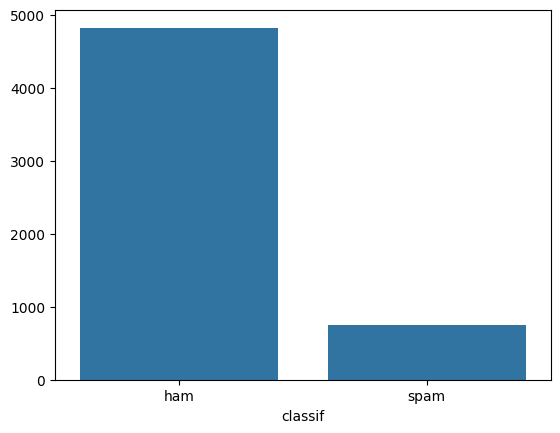

In [101]:
value_counts = df_spam['classif'].value_counts(dropna=False)
sns.barplot(x=value_counts.index, y=value_counts.values)

#### distribution of the length of the emails look like:

<Axes: ylabel='Frequency'>

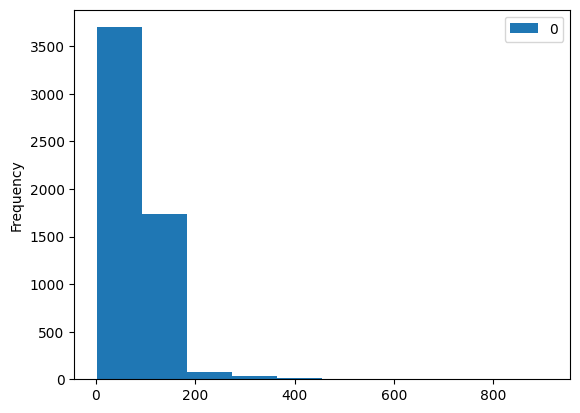

In [102]:
pd.DataFrame([len(msg) for msg in df_spam['email_body']]).plot(kind='hist')

#### Minimum, mean and maximum length an email could have:

In [103]:
print(f"Minimum: {min([len(msg) for msg in df_spam['email_body']])}")
print(f"Mean: {np.mean(np.array(([len(msg) for msg in df_spam['email_body']])))}")
print(f"Maximum: {max([len(msg) for msg in df_spam['email_body']])}")

Minimum: 2
Mean: 80.11880832735105
Maximum: 910


## Preprocessing

#### Encoding "ham" with 0 and "spam" with 1.

In [104]:
df_spam['classif'] = df_spam['classif'].map({'ham' : 0, 'spam' : 1})
df_spam

,classif,email_body,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,0,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,0,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,0,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,0,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,0,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,0,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,0,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [105]:
df_spam = df_spam.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'])
df_spam

,classif,email_body
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


# Task 2

Take an email string and convert it to a list of stemmed words.

Define a function `process_email` that executes the following algorithm on a string:

1. Convert to lower case.
2. Use the following regular expressions to clean the emails (you can use the `re.sub` function from the built-in `re` module):
   - replace all html tags with empty string using `<[^<>]+>`;
   - replace all numbers with the word "number" using `[0-9]+`;
   - replace all web links with the word "httpaddr" using `(http|https)://[^\s]*`;
   - replace all email addresses with the word "emailaddr" using `[^\s]+@[^\s]+`;
   - replace all email addresses with the word "dollar" using `[$]+`.
4. Tokenize the result using `nltk.tokenize.word_tokenize`.
5. Remove numbers and stem each word.
   - Use the `PorterStemmer` class to create an object and stem each word.
6. Filter out empty strings.

Apply this function on the example email to check your answer.

In [106]:
import nltk.stem.porter


def process_email(contents):
    contents = contents.lower()
    
    contents = re.sub('<[^<>]+>', '', contents)
    contents = re.sub('[0-9]+', 'number', contents)
    contents = re.sub('(http|https)://[^\s]*', 'httpaddr', contents)
    contents = re.sub('[^\s]+@[^\s]+', 'emailaddr', contents)
    contents = re.sub('[$]+', 'dollar', contents)
    
    contents = nltk.tokenize.word_tokenize(contents)
   
    stemmer = nltk.stem.porter.PorterStemmer()
    contents = [stemmer.stem(word) for word in contents]
    
    contents = list(filter(lambda word : word != '', contents))
    
    return contents


email = """> Anyone knows how much it costs to host a web portal?
>
Well, it depends on how many visitors you're expecting.add()
This can be anywhere from less than 10 bucks a month to a couple of $100.
You should checkout http://www.rackspace.com/ or perhaps Amazon EC2
if youre running something big...

To unsubscribe yourself from this mailing list, send an email to:
groupname-unsubscribe@egroups.com

"""

expected = ['>', 'anyon', 'know', 'how', 'much', 'it', 'cost', 'to', 'host', 'a', 'web', 'portal', '?', '>', 'well', ',', 'it', 'depend', 'on', 'how', 'mani', 'visitor', 'you', "'re", 'expecting.add', '(', ')', 'thi', 'can', 'be', 'anywher', 'from', 'less', 'than', 'number', 'buck', 'a', 'month', 'to', 'a', 'coupl', 'of', 'dollarnumb', '.', 'you', 'should', 'checkout', 'httpaddr', 'or', 'perhap', 'amazon', 'ecnumb', 'if', 'your', 'run', 'someth', 'big', '...', 'to', 'unsubscrib', 'yourself', 'from', 'thi', 'mail', 'list', ',', 'send', 'an', 'email', 'to', ':', 'emailaddr']
actual = process_email(email)
print(actual)
assert actual == expected, 'Output does not match.'

['>', 'anyon', 'know', 'how', 'much', 'it', 'cost', 'to', 'host', 'a', 'web', 'portal', '?', '>', 'well', ',', 'it', 'depend', 'on', 'how', 'mani', 'visitor', 'you', "'re", 'expecting.add', '(', ')', 'thi', 'can', 'be', 'anywher', 'from', 'less', 'than', 'number', 'buck', 'a', 'month', 'to', 'a', 'coupl', 'of', 'dollarnumb', '.', 'you', 'should', 'checkout', 'httpaddr', 'or', 'perhap', 'amazon', 'ecnumb', 'if', 'your', 'run', 'someth', 'big', '...', 'to', 'unsubscrib', 'yourself', 'from', 'thi', 'mail', 'list', ',', 'send', 'an', 'email', 'to', ':', 'emailaddr']


# Task 3

Take a list of emails and get a dictionary of the most common words.

A vocabulary of size `n` is the enumerated mapping of the `n` most common words.

Define a function `get_vocabulary` that accepts a list of email strings and an upper limit for the size of the vocabulary (mapping from index to words) and builds a vocabulary with that size.

In [107]:
def get_vocabulary(emails, vocab_length):
    processed_email_words = []
    for email in emails:
        processed_email_words += process_email(email)
        
    most_common = list(Counter(processed_email_words).most_common(vocab_length))
    return {index : word[0] for index, word in enumerate(most_common)}
   

expected = {0: '.', 1: 'i', 2: 'number', 3: 'to', 4: 'you', 5: ',', 6: '?', 7: 'a', 8: '!', 9: 'the', 10: '...', 11: 'u', 12: 'and', 13: 'it', 14: '&', 15: 'is', 16: 'in', 17: 'me', 18: ';', 19: 'my', 20: ':'}
vocabulary = get_vocabulary(df_spam['email_body'], 2000)
actual = {key : value for key, value in vocabulary.items() if key <= 20}

assert actual == expected, 'Output does not match.'

Define a function `get_indices` that returns the indices of words used in a given email using the vocabulary.

If a word is not present in the vocabulary, assign `None` for its index.

In [108]:
def get_indices(email, vocabulary):
    reverse_lookup = dict(zip(vocabulary.values(), vocabulary.keys()))
    word_indices = set()
    
    for word in email:
        if word in vocabulary.values():
            word_indices.add(reverse_lookup.get(word, None))
    
    return word_indices


expected = {0, 2, 3, 4, 5, 6, 7, 10, 13, 20, 22, 27, 29, 30, 39, 40, 41, 46, 52, 53, 63, 65, 86, 132, 142, 143, 152, 164, 177, 224, 261, 322, 346, 355, 369, 414, 463, 517, 554, 591, 609, 612, 628, 657, 817, 891, 986, 1056, 1095, 1226}
actual = get_indices(process_email(email), get_vocabulary(df_spam['email_body'], 2000))

print(actual)
assert actual == expected, 'Output does not match.'

{0, 2, 3, 4, 517, 6, 7, 5, 261, 10, 132, 13, 142, 143, 657, 20, 22, 152, 27, 29, 30, 414, 1056, 164, 39, 40, 41, 554, 46, 177, 817, 52, 53, 63, 65, 322, 1095, 1226, 463, 591, 86, 346, 986, 224, 609, 355, 612, 369, 628, 891}


Define a function `get_feature_vector` that takes word indices and a vocabulary size and returns a vector of the size of the vocabulary whose elements are equal to:

- `1` if the given element is in the index;
- `-1` otherwise.

In [109]:
def get_feature_vector(word_indices, vocab_length):
    vec = np.zeros(vocab_length) - 1
    
    for index in word_indices:
        vec[index] = 1
    
    return vec


test_indices = get_indices(process_email(email), get_vocabulary(df_spam['email_body'], 2000))
get_feature_vector(test_indices, 2000)

array([ 1., -1.,  1., ..., -1., -1., -1.])

# Task 4

Create a variable `vocab_length` and set it to 2000.

Apply the `process_email` function to each email in the data to see what the outputs would look like when creating the vocabulary.

In [110]:
vocab_length = 2000
emails = df_spam['email_body'].map(process_email)
emails

0       [go, until, jurong, point, ,, crazi, .., avail...
1                  [ok, lar, ..., joke, wif, u, oni, ...]
2       [free, entri, in, number, a, wkli, comp, to, w...
3       [u, dun, say, so, earli, hor, ..., u, c, alrea...
4       [nah, i, do, n't, think, he, goe, to, usf, ,, ...
                              ...                        
5567    [thi, is, the, numbernd, time, we, have, tri, ...
5568         [will, ì_, b, go, to, esplanad, fr, home, ?]
5569    [piti, ,, *, wa, in, mood, for, that, ., so, ....
5570    [the, guy, did, some, bitch, but, i, act, like...
5571                    [rofl, ., it, true, to, it, name]
Name: email_body, Length: 5572, dtype: object

In [111]:
# Split into "X" and "y". "X" will be the matrix of feature vectors obtained for every email.
y = df_spam['classif']
X = list(map(lambda x: get_feature_vector(get_indices(x, vocabulary), vocab_length), emails))
X = pd.DataFrame(np.array(X).astype(np.int16))

In [112]:
# Display "X".
X

,0,1,2,3,4,5,6,7,8,9,...,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999
0,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
2,1,-1,1,1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
3,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
4,-1,1,-1,1,-1,1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5567,1,-1,1,-1,-1,1,-1,-1,1,1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
5568,-1,-1,-1,1,-1,-1,1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
5569,1,-1,-1,-1,-1,1,1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
5570,-1,1,-1,1,-1,-1,-1,-1,-1,1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


In [113]:
# Splint for training and test with 80% of the data used for training.
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

## Modelling

In [114]:
# Create a dataframe for storing the results from the experiments.
df_results = pd.DataFrame(columns=['experiment', 'accuracy', 'precision', 'recall', 'f1-score'])
df_results

,experiment,accuracy,precision,recall,f1-score


### Random

In [115]:
# Evaluate random guessing.
y_pred = np.random.choice(y_test, y_test.shape[0])
print(classification_report(y_test, y_pred))
df_results = pd.concat([df_results, pd.DataFrame({
    'experiment': ['random'],
    'accuracy': [accuracy_score(y_test, y_pred)],
    'precision': [precision_score(y_test, y_pred)],
    'recall': [recall_score(y_test, y_pred)],
    'f1-score': [f1_score(y_test, y_pred)]
})], ignore_index=True)
df_results

              precision    recall  f1-score   support

           0       0.89      0.89      0.89       981
           1       0.17      0.16      0.17       134

    accuracy                           0.80      1115
   macro avg       0.53      0.53      0.53      1115
weighted avg       0.80      0.80      0.80      1115



/tmp/ipykernel_11122/925198485.py:4: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_results = pd.concat([df_results, pd.DataFrame({


,experiment,accuracy,precision,recall,f1-score
0,random,0.803587,0.170543,0.164179,0.1673


### Most common

In [116]:
# Evaluate predicting the most common class.
y_pred = np.zeros(y_test.shape[0])
print(classification_report(y_test, y_pred))
df_results = pd.concat([df_results, pd.DataFrame({
    'experiment': ['most_frequent'],
    'accuracy': [accuracy_score(y_test, y_pred)],
    'precision': [precision_score(y_test, y_pred)],
    'recall': [recall_score(y_test, y_pred)],
    'f1-score': [f1_score(y_test, y_pred)]
})], ignore_index=True)
df_results

              precision    recall  f1-score   support

           0       0.88      1.00      0.94       981
           1       0.00      0.00      0.00       134

    accuracy                           0.88      1115
   macro avg       0.44      0.50      0.47      1115
weighted avg       0.77      0.88      0.82      1115



/home/deyan/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/deyan/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/deyan/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/deyan/.local/lib/py

,experiment,accuracy,precision,recall,f1-score
0,random,0.803587,0.170543,0.164179,0.1673
1,most_frequent,0.879821,0.000000,0.000000,0.0000


### KNN

In [117]:
# Evaluate the K Nearest Neighbor algorithm.
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test.to_numpy())
print(classification_report(y_test, y_pred))
df_results = pd.concat([df_results, pd.DataFrame({
    'experiment': ['KNN'],
    'accuracy': [accuracy_score(y_test, y_pred)],
    'precision': [precision_score(y_test, y_pred)],
    'recall': [recall_score(y_test, y_pred)],
    'f1-score': [f1_score(y_test, y_pred)]
})], ignore_index=True)
df_results


              precision    recall  f1-score   support

           0       0.95      1.00      0.97       981
           1       1.00      0.57      0.73       134

    accuracy                           0.95      1115
   macro avg       0.97      0.79      0.85      1115
weighted avg       0.95      0.95      0.94      1115



,experiment,accuracy,precision,recall,f1-score
0,random,0.803587,0.170543,0.164179,0.167300
1,most_frequent,0.879821,0.000000,0.000000,0.000000
2,KNN,0.948879,1.000000,0.574627,0.729858


### Logistic regression

In [118]:
# Evaluate the Logistic Regression algorithm.
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
df_results = pd.concat([df_results, pd.DataFrame({
    'experiment': ['logistic_regression'],
    'accuracy': [accuracy_score(y_test, y_pred)],
    'precision': [precision_score(y_test, y_pred)],
    'recall': [recall_score(y_test, y_pred)],
    'f1-score': [f1_score(y_test, y_pred)]
})], ignore_index=True)
df_results

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       981
           1       0.98      0.90      0.93       134

    accuracy                           0.98      1115
   macro avg       0.98      0.95      0.96      1115
weighted avg       0.98      0.98      0.98      1115



/home/deyan/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,experiment,accuracy,precision,recall,f1-score
0,random,0.803587,0.170543,0.164179,0.167300
1,most_frequent,0.879821,0.000000,0.000000,0.000000
2,KNN,0.948879,1.000000,0.574627,0.729858
3,logistic_regression,0.984753,0.975610,0.895522,0.933852


### Support Vector Classifier

In [119]:
# Create and train a support vector machine.
model = SVC()
model.fit(X_train, y_train)

# Note: In sklearn, the SVM is implemented as the SVC class
# and the SVC is implemented as the LinearSVC class.

SVC()

## Model evaluation

Answer the following questions:
- What is a confusion matrix?
- What is accuracy?
- What is accuracy in terms of the confusion matrix?
- When should accuracy be used?
- When shouldn't accuracy be used?
- What is precision?
- What is recall?
- What is the f1-score?|

My answer:
* Confusion matrix, shows us the number of true positive(TP), true negatives(TN), false positive(FP) and false negative(FN) results of a model.
* Accuracy measures how often the model is predicting the correct value. More formally: accuracy = (TP + TN) / (TP + TN + FP + FN).
* accuracy = (TP + TN) / (TP + TN + FP + FN).
* Accuracy should be used when the dataset is well balanced, meaning the counts of the values of the target feature are roughly the same.
* Accuracy should not be used when the dataset is not balanced or the importance of FP and FN is not the same.
* Precision = TP / (TP + FP). Precision is measuring the accuracy of the positive predictions.
* Recall = TP / (TP + FN). Recall is measuring how well the model can identify positive cases.
* F1-score = 2x (Precision * Recall) / (Precision + Recall). This is one metric that is balancing between precision and recall. This one is usually the metric we are looking for, because it is considering both precision and recall and it is useful when the dataset is imbalanced.

In [120]:
# Use the svm to obtain predictions.
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, ..., 1, 0, 0])

In [121]:
# Display the metrics.
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.98      1.00      0.99       981
           1       1.00      0.89      0.94       134

    accuracy                           0.99      1115
   macro avg       0.99      0.94      0.97      1115
weighted avg       0.99      0.99      0.99      1115



In [122]:
# Add the metrics to the table with results from your experiments.
df_results = pd.concat([df_results, pd.DataFrame({
    'experiment': ['SVM'],
    'accuracy': [accuracy_score(y_test, y_pred)],
    'precision': [precision_score(y_test, y_pred)],
    'recall': [recall_score(y_test, y_pred)],
    'f1-score': [f1_score(y_test, y_pred)]
})], ignore_index=True)
df_results

,experiment,accuracy,precision,recall,f1-score
0,random,0.803587,0.170543,0.164179,0.167300
1,most_frequent,0.879821,0.000000,0.000000,0.000000
2,KNN,0.948879,1.000000,0.574627,0.729858
3,logistic_regression,0.984753,0.975610,0.895522,0.933852
4,SVM,0.986547,1.000000,0.888060,0.940711


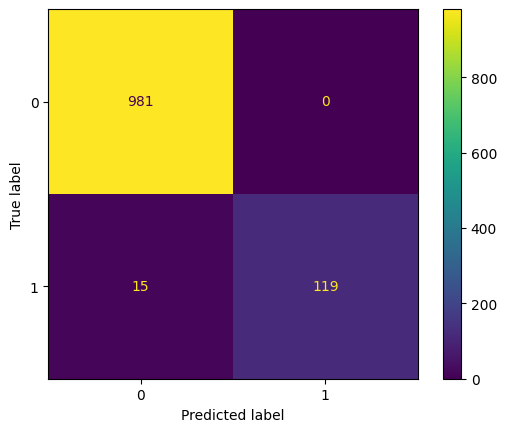

In [123]:
# Plot the confusion matrix.
cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
# Feel free to look at the solutions for the previous week to see how this can be done.

Precision and Recall can hardly be maximized together.
- return 1 example from positive class => precision=1, recall~0
- return all examples => precision~(prob of positive class. if balanced 0.5), recall=1

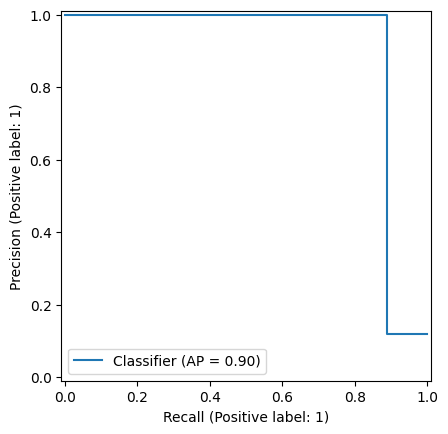

In [124]:
# Plot the precision recall curve.
PrecisionRecallDisplay.from_predictions(y_test, y_pred)
plt.show()
# Feel free to look at the solutions for the previous week to see how this can be done.

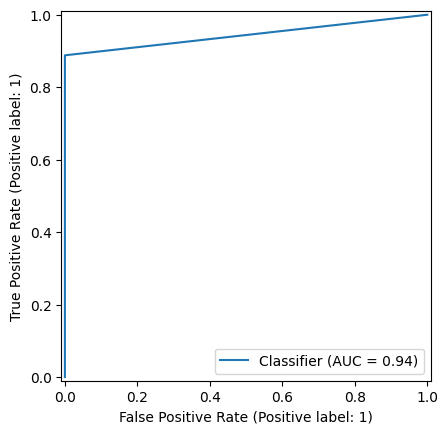

In [125]:
# Plot the receiver operator curve.
RocCurveDisplay.from_predictions(y_test, y_pred)
plt.show()
# Feel free to look at the solutions for the previous week to see how this can be done.

In [126]:
# Display the final results. Which model would you chose to give to the client?
df_results

,experiment,accuracy,precision,recall,f1-score
0,random,0.803587,0.170543,0.164179,0.167300
1,most_frequent,0.879821,0.000000,0.000000,0.000000
2,KNN,0.948879,1.000000,0.574627,0.729858
3,logistic_regression,0.984753,0.975610,0.895522,0.933852
4,SVM,0.986547,1.000000,0.888060,0.940711
